# Heirarichal Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dat = pd.read_csv('data.csv')

In [3]:
dat.head()

,target,x1,x2,x3,x4,x5
0,9,-0.0125,59,286,4.970,0.219
1,9,0.2220,293,286,0.997,1.000
2,9,0.1650,292,286,0.973,1.000
3,9,0.0882,284,286,1.000,0.980
4,9,0.0581,285,286,0.996,0.977


In [4]:
print('target/9--> ',dat['target'].value_counts()[:1].values[0])
print('target/others-->',np.sum(dat['target'].value_counts()[1:].values))

target/9-->  72544
target/others--> 33188


In [5]:
#first classifier to seperate target 9 and others classes
X_1 = np.array(dat.iloc[:,1:])
y_1 = np.array(dat['target']==9,dtype=np.int64)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [7]:
X_1_scaled = scaler.fit_transform(X_1)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_1_scaled, y_1, test_size=0.3, random_state=42)

In [10]:
dat.iloc[:,1:].corr()

,x1,x2,x3,x4,x5
x1,1.000000,0.064545,-0.075859,-0.121783,0.152412
x2,0.064545,1.000000,0.291097,-0.390743,0.627725
x3,-0.075859,0.291097,1.000000,-0.024019,0.000462
x4,-0.121783,-0.390743,-0.024019,1.000000,-0.604099
x5,0.152412,0.627725,0.000462,-0.604099,1.000000


In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
lg_1 = RandomForestClassifier()
lg_1.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [14]:
from sklearn.metrics import f1_score

In [15]:
f1_score(lg_1.predict(X_train),y_train)

0.9986034618410701

In [16]:
f1_score(lg_1.predict(X_test),y_test)

0.9788930365454629

In [17]:
dat['target'].value_counts()[1:]

8     8051
11    7233
13    7107
3     3603
4     2526
2     1194
6      802
22     575
0      472
1      437
18     260
19     229
20     191
16     148
21     126
5      106
7       83
17      16
10      15
14       6
15       6
12       2
Name: target, dtype: int64

In [18]:
#building a classifier to differentiate(8,11,13,3,4,'others')

In [19]:
dat_1  = dat[dat['target']!=9]

In [20]:
z = np.array(dat_1['target'].values)

In [21]:
l = []
for i in z:
    if i in [8,11,13,3,4]:
        l.append(i)
    else:
        l.append('others')

In [22]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [23]:
X_2 = np.array(dat_1.iloc[:,1:].values)
y_2 = lb.fit_transform(np.array(l))

In [24]:
X_2_scaled = scaler.fit_transform(X_2)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_2_scaled, y_2, test_size=0.3, random_state=42)

In [26]:
# Fit an independent logistic regression model for each class using the
# OneVsRestClassifier wrapper.
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import jaccard_similarity_score
from sklearn.tree import DecisionTreeClassifier
ovr2 = OneVsRestClassifier(DecisionTreeClassifier(max_depth=3))
ovr2.fit(X_train, y_train)
y_pred_ovr = ovr2.predict(X_test)
print(jaccard_similarity_score(y_train,ovr2.predict(X_train)))
print(jaccard_similarity_score(y_test, ovr2.predict(X_test)))

0.8571736042357195
0.8558802852264739


In [27]:
#creating a seperate classifier to seperate(2,6,22,0,1,'others')
l = []
for i in dat_1['target'].values:
    if i in [8,11,13,3,4]:
        l.append(False)
    else:
        l.append(True)
dat_2 = dat_1[l]

In [28]:
dat_2['target'].value_counts()

2     1194
6      802
22     575
0      472
1      437
18     260
19     229
20     191
16     148
21     126
5      106
7       83
17      16
10      15
14       6
15       6
12       2
Name: target, dtype: int64

In [29]:
z = np.array(dat_2['target'].values)
l = []
for i in z:
    if i in [2,6,22,0,1]:
        l.append(i)
    else:
        l.append('others')

In [30]:
X_3 = np.array(dat_2.iloc[:,1:].values)
y_3 = lb.fit_transform(np.array(l))

In [31]:
lb.classes_

array(['0', '1', '2', '22', '6', 'others'], dtype='<U21')

In [32]:
X_3_scaled = scaler.fit_transform(X_3)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_3_scaled, y_3, test_size=0.3, random_state=42)

In [34]:
# Fit an independent logistic regression model for each class using the
# OneVsRestClassifier wrapper.
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import jaccard_similarity_score
from sklearn.tree import DecisionTreeClassifier
ovr3 = OneVsRestClassifier(DecisionTreeClassifier(max_depth=3))
ovr3.fit(X_train, y_train)
y_pred_ovr = ovr3.predict(X_test)
print(jaccard_similarity_score(y_train,ovr3.predict(X_train)))
print(jaccard_similarity_score(y_test, ovr3.predict(X_test)))

0.8558310376492194
0.8408279800142755


In [35]:
#creating a classifier to seperate(18,19,20,16,21,5,'others')
l = []
for i in dat_2['target'].values:
    if i in [2,6,22,0,1]:
        l.append(False)
    else:
        l.append(True)
dat_3 = dat_2[l]

In [36]:
dat_3['target'].value_counts()

18    260
19    229
20    191
16    148
21    126
5     106
7      83
17     16
10     15
15      6
14      6
12      2
Name: target, dtype: int64

In [37]:
z = np.array(dat_3['target'].values)
l = []
for i in z:
    if i in [18,19,20,16,21,5]:
        l.append(i)
    else:
        l.append('others')

In [38]:
X_4 = np.array(dat_3.iloc[:,1:].values)
y_4 = lb.fit_transform(np.array(l))

In [39]:
lb.classes_

array(['16', '18', '19', '20', '21', '5', 'others'], dtype='<U21')

In [40]:
X_4_scaled = scaler.fit_transform(X_4)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_4_scaled, y_4, test_size=0.3, random_state=42)

In [42]:
# Fit an independent logistic regression model for each class using the
# OneVsRestClassifier wrapper.
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import jaccard_similarity_score
from sklearn.tree import DecisionTreeClassifier
ovr4 = OneVsRestClassifier(DecisionTreeClassifier(max_depth=5))
ovr4.fit(X_train, y_train)
y_pred_ovr = ovr4.predict(X_test)
print(jaccard_similarity_score(y_train,ovr4.predict(X_train)))
print(jaccard_similarity_score(y_test, ovr4.predict(X_test)))

0.9663056558363418
0.896358543417367


In [43]:
#creating a classifier to seperate(7,'others')
l = []
for i in dat_3['target'].values:
    if i in [18,19,20,16,21,5]:
        l.append(False)
    else:
        l.append(True)
dat_4 = dat_3[l]

In [44]:
dat_4['target'].value_counts()

7     83
17    16
10    15
15     6
14     6
12     2
Name: target, dtype: int64

In [45]:
X_4 = np.array(dat_4.iloc[:,1:].values)
y_4 = np.array((dat_4['target']==7),dtype=np.int64)

In [46]:
X_4_scaled = scaler.fit_transform(X_4)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_4_scaled, y_4, test_size=0.3, random_state=42)

In [48]:
lg_5 = LogisticRegression()
lg_5.fit(X_train,y_train)
print(f1_score(lg_5.predict(X_train),y_train))
print(f1_score(lg_5.predict(X_test),y_test))

0.8503937007874016
0.8387096774193548


In [49]:
##creating a classifier to seperate('17','10','15','14','12')
l = []
for i in dat_4['target'].values:
    if i in [7]:
        l.append(False)
    else:
        l.append(True)
dat_5 = dat_4[l]

In [50]:
dat_5['target'].value_counts()

17    16
10    15
15     6
14     6
12     2
Name: target, dtype: int64

In [51]:
X_5 = np.array(dat_5.iloc[:,1:].values)
y_5 = lb.fit_transform(dat_5['target'].values)

In [52]:
lb.classes_

array([10, 12, 14, 15, 17])

In [53]:
X_5_scaled = scaler.fit_transform(X_5)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_5_scaled, y_5, test_size=0.3, random_state=42)

In [55]:
# Fit an independent logistic regression model for each class using the
# OneVsRestClassifier wrapper.
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import jaccard_similarity_score
from sklearn.tree import DecisionTreeClassifier
ovr6 = OneVsRestClassifier(LogisticRegression())
ovr6.fit(X_train, y_train)
y_pred_ovr = ovr6.predict(X_test)
print(jaccard_similarity_score(y_train,ovr6.predict(X_train)))
print(jaccard_similarity_score(y_test, ovr6.predict(X_test)))

0.8709677419354839
0.5714285714285714


In [56]:
def predict(x):
    if lg_1.predict(x)[0]==1:
        return 9
    elif ovr2.predict(x)[0]==0:
        return 11
    elif ovr2.predict(x)[0]==1:
        return 13
    elif ovr2.predict(x)[0]==2:
        return 3
    elif ovr2.predict(x)[0]==3:
        return 4
    elif ovr2.predict(x)[0]==4:
        return 8
    elif ovr3.predict(x)[0]==0:
        return 0
    elif ovr3.predict(x)[0]==1:
        return 1
    elif ovr3.predict(x)[0]==2:
        return 2
    elif ovr3.predict(x)[0]==3:
        return 22
    elif ovr3.predict(x)[0]==4:
        return 6
    elif ovr4.predict(x)[0]==0:
        return 16
    elif ovr4.predict(x)[0]==1:
        return 18
    elif ovr4.predict(x)[0]==2:
        return 19
    elif ovr4.predict(x)[0]==3:
        return 20
    elif ovr4.predict(x)[0]==4:
        return 21
    elif ovr4.predict(x)[0]==5:
        return 5
    elif lg_5.predict(x)[0]==1:
        return 7
    elif ovr6.predict(x)[0]==0:
        return 10
    elif ovr6.predict(x)[0]==1:
        return 12
    elif ovr6.predict(x)[0]==2:
        return 14
    elif ovr6.predict(x)[0]==3:
        return 15
    elif ovr6.predict(x)[0]==4:
        return 17        

In [57]:
X = dat.iloc[:,1:].values
y = dat['target'].values

In [58]:
X_scaled = scaler.fit_transform(X)

In [59]:
predict(X_scaled[1].reshape(1,-1))

9

In [60]:
y_pred = [predict(X_scaled[i].reshape(1,-1)) for i in range(len(X))]

In [61]:
jaccard_similarity_score(y,np.array(y_pred))

0.8199693564862104

In [62]:
from sklearn.metrics import confusion_matrix

In [63]:
pd.DataFrame(confusion_matrix(y,np.array(y_pred)))

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0,0,133,0,0,0,0,0,0,0,...,106,0,0,0,0,0,1,1,6,225
1,0,0,168,0,0,0,1,0,0,0,...,253,0,0,0,2,0,0,6,4,0
2,31,0,104,0,53,1,27,9,4,1,...,152,0,0,0,123,0,0,31,277,373
3,0,0,23,915,0,0,0,7,1172,71,...,905,0,0,0,35,0,9,396,34,0
4,0,0,22,0,1480,0,0,22,1,54,...,682,0,0,180,2,2,2,30,21,16
5,0,0,0,104,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
6,0,0,40,0,174,0,119,2,1,81,...,292,0,0,0,0,0,1,1,75,11
7,0,0,0,0,0,0,4,2,0,6,...,45,0,0,1,0,0,0,0,6,0
8,0,0,29,1091,7,0,81,451,3908,2,...,2352,0,0,0,0,0,0,2,24,16
9,9,0,31,64,39,1,7,14,15,72010,...,227,0,1,5,5,0,4,39,19,6


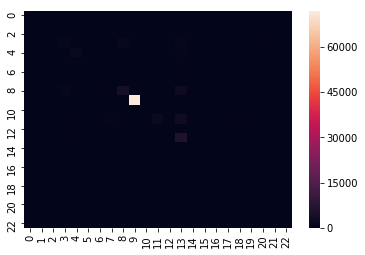

In [64]:
import seaborn as sn
sn.heatmap(pd.DataFrame(confusion_matrix(y,np.array(y_pred))))